In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from shutil import copy
import cv2
from PIL import Image

import pickle

In [136]:
df = pd.read_csv(r'D:\trainLabels.csv')

df[['ID', 'eye']] = df['image'].str.split('_', 1, expand=True)
df['eye'].replace({'left':0, 'right':1}, inplace = True)
df['image'] = df['image'] + '.jpeg'

df.drop([162,163], inplace = True) # Drop corropted entries


In [137]:
df.head()

,image,level,ID,eye
0,10_left.jpeg,0,10,0
1,10_right.jpeg,0,10,1
2,13_left.jpeg,0,13,0
3,13_right.jpeg,0,13,1
4,15_left.jpeg,1,15,0


array([[<AxesSubplot:title={'center':'level'}>,
        <AxesSubplot:title={'center':'eye'}>]], dtype=object)

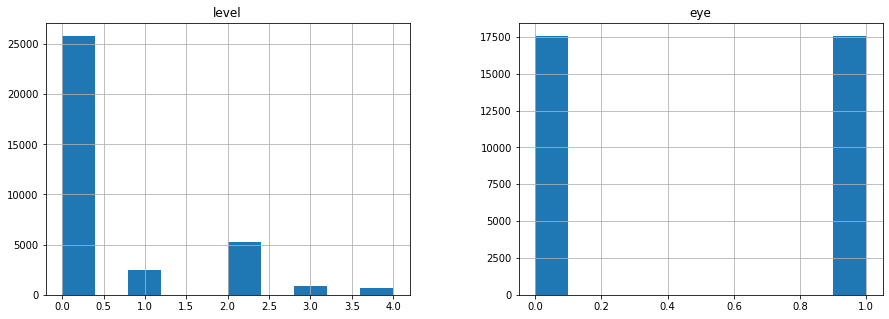

In [138]:
df[['level', 'eye']].hist(figsize = (15, 5))

In [323]:
# train_df = df.groupby(['level', 'eye']).apply(lambda x: x.sample(100, replace = True))
# train_df.drop_duplicates(inplace = True)


file = open('D:/DR/train_df.pickle', 'rb')
train_df = pickle.load(file)
file = open('D:/DR/train_images.pickle', 'rb')
image_arr = pickle.load(file)

In [275]:
train_df.head()

image  level     ID  eye
level eye                                          
0     0   7466    9390_left.jpeg      0   9390    0
          24078  30413_left.jpeg      0  30413    0
          6012    7588_left.jpeg      0   7588    0
          12994  16335_left.jpeg      0  16335    0
          23498  29702_left.jpeg      0  29702    0

array([[<AxesSubplot:title={'center':'level'}>,
        <AxesSubplot:title={'center':'eye'}>]], dtype=object)

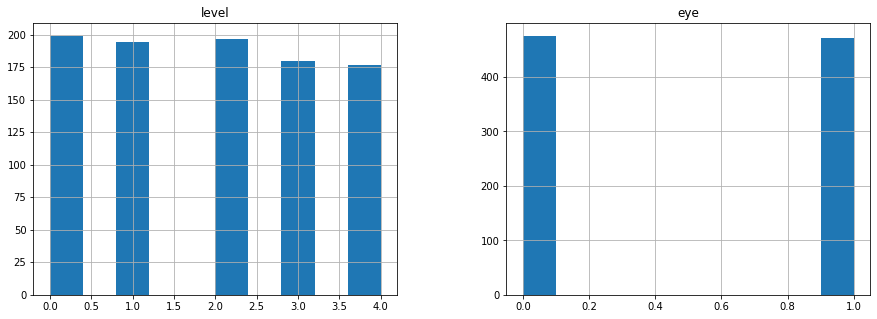

In [269]:
train_df[['level', 'eye']].hist(figsize = (15, 5))

In [285]:
train_df.reset_index(inplace=True, drop=True)

sample_1 = train_df.groupby(['level', 'eye']).apply(lambda x: x.sample(1, replace = True))
sample_1

image  level     ID  eye
level eye                                         
0     0   92    39541_left.jpeg      0  39541    0
      1   153  10155_right.jpeg      0  10155    1
1     0   224   34382_left.jpeg      1  34382    0
      1   301  32918_right.jpeg      1  32918    1
2     0   396   41192_left.jpeg      2  41192    0
      1   503   8116_right.jpeg      2   8116    1
3     0   607   11035_left.jpeg      3  11035    0
      1   732  27653_right.jpeg      3  27653    1
4     0   855    9157_left.jpeg      4   9157    0
      1   878  12861_right.jpeg      4  12861    1

<Figure size 432x288 with 0 Axes>

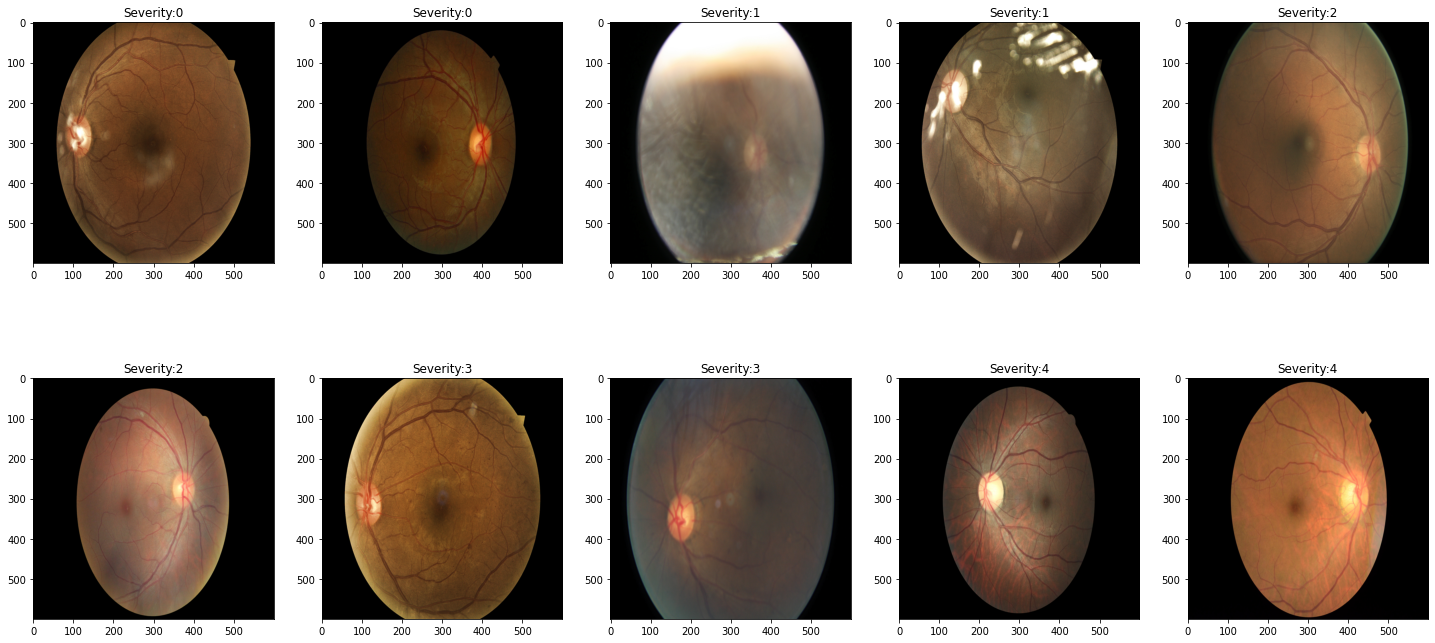

In [343]:
sample_ids = sample_1['ID'].tolist()
sample_images = []
all_ids = train_df['ID'].tolist()
for ids in sample_ids:
    sample_images.append(image_arr[all_ids.index(ids)])

plt.figure()

f, axarr = plt.subplots(2,5, figsize = (25, 12)) 
for i in range(len(sample_images)):
    axarr[i//5, i%5].imshow(sample_images[i])
    axarr[i//5, i%5].set_title(f'Severity:{i//2}')


In [ ]:
all_paths = pd.Series(os.listdir("E:/train_1"))

In [302]:
all_paths = pd.Series(os.listdir("E:/train_1"))
paths_1 = train_df['image']
paths_1 = all_paths[all_paths.isin(paths_1)]
src_base = "E:/train_1/"
dest_base = "E:/train/"
for path in paths_1:
    copy(src_base+path, dest_base)
len(paths_1)

246

In [303]:
all_paths = pd.Series(os.listdir("E:/train_2"))
paths_2 = train_df['image']
paths_2 = all_paths[all_paths.isin(paths_2)]
src_base = "E:/train_2/"
dest_base = "E:/train/"
for path in paths_2:
    copy(src_base+path, dest_base)
len(paths_2)

222

In [304]:
all_paths = pd.Series(os.listdir("E:/train_3"))
paths_3 = train_df['image']
paths_3 = all_paths[all_paths.isin(paths_3)]
src_base = "E:/train_3/"
dest_base = "E:/train/"
for path in paths_3:
    copy(src_base+path, dest_base)
len(paths_3)

242

In [305]:
all_paths = pd.Series(os.listdir("E:/train_4"))
paths_4 = train_df['image']
paths_4 = all_paths[all_paths.isin(paths_4)]
src_base = "E:/train_4/"
dest_base = "E:/train/"
for path in paths_4:
    copy(src_base+path, dest_base)

len(paths_4)

191

10017_right.jpeg 4


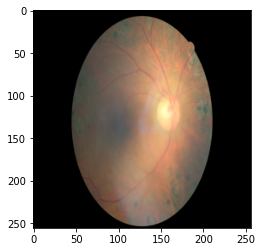

In [14]:
base = "D:/DR/train/"
paths = os.listdir(base)
images = []
ys = []
for path in paths:
    img = Image.open(base + path)
    img = np.array(img.resize((256,256)))
    y = int(train_df.query(f"image == '{path}'")['level'])
#     ys.append(y)
#     images.append(img)
    imgplot = plt.imshow(img)
    print(path, y)
    break

In [229]:
np.array(images).shape

(948, 600, 600)

In [15]:
file = open('D:/DR/train_df.pickle', 'wb')

# dump dataframe to file
pickle.dump(train_df, file)

In [402]:
file = open('D:/DR/train_images.pickle', 'wb')

# dump images to file
pickle.dump(images, file)

In [382]:
file = open('D:/DR/train_labels.pickle', 'wb')

# dump images to file
pickle.dump(np.array(ys), file)

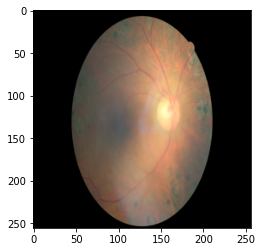

In [5]:
file = open('D:/DR/train_images_256.pickle', 'rb')
images_1 = pickle.load(file)

imgplot = plt.imshow(images_1[0])
